In [1]:
import numpy as np
import pandas as pd
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from sklearn.metrics import r2_score

plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

import yfinance as yf

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [2]:
def get_close_stock_price(codes, start_date='2020-01-01', end_date='2020-04-30'):
    data = { code : yf.download(code, start_date, end_date) for code in codes }
    data = { key : pd.DataFrame(value, columns=['Close']).rename(columns={'Close': f'{key}'}) for key, value in data.items() }
    df = None
    for key, value in data.items():
        if df is None:
            df = value
        else:
            df = df.merge(value, left_index=True, right_index=True)
    return df

df = get_close_stock_price(['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'FB'])
df.to_csv('data/close_price_big_5_2020.csv')

df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,GOOGL,MSFT,AMZN,FB
Date,,,,,
2019-12-31,293.649994,1339.390015,157.699997,1847.839966,205.250000
2020-01-02,300.350006,1368.680054,160.619995,1898.010010,209.779999
2020-01-03,297.429993,1361.520020,158.619995,1874.969971,208.669998
2020-01-06,299.799988,1397.810059,159.029999,1902.880005,212.600006
2020-01-07,298.390015,1395.109985,157.580002,1906.859985,213.059998
...,...,...,...,...,...
2020-04-23,275.029999,1271.170044,171.419998,2399.449951,185.130005
2020-04-24,282.970001,1276.599976,174.550003,2410.219971,190.070007
2020-04-27,283.170013,1270.859985,174.050003,2376.000000,187.500000


### Investigate if stock price of Big 5 companies are related to each other by pct_change() function

In [44]:
df1 = pd.read_csv('data/close_price_big_5_2020.csv', index_col=['Date'], infer_datetime_format=True, parse_dates=['Date'])

df1 = df1.pct_change() * 100
df1.tail(10)

,AAPL,GOOGL,MSFT,AMZN,FB
Date,,,,,
2020-04-16,0.794575,0.010340,3.002088,4.355457,-0.406849
2020-04-17,-1.356871,1.715399,0.881164,-1.378211,1.696457
2020-04-20,-2.075670,-1.395620,-1.982088,0.783583,-0.557911
2020-04-21,-3.091033,-3.884549,-4.135719,-2.736034,-4.174148
2020-04-22,2.880356,3.815503,3.396494,1.519246,6.721309
2020-04-23,-0.387543,1.013979,-1.210239,1.521477,1.563532
2020-04-24,2.886959,0.427160,1.825927,0.448854,2.668396
2020-04-27,0.070683,-0.449631,-0.286451,-1.419786,-1.352137
2020-04-28,-1.620944,-3.011348,-2.436085,-2.606057,-2.447998


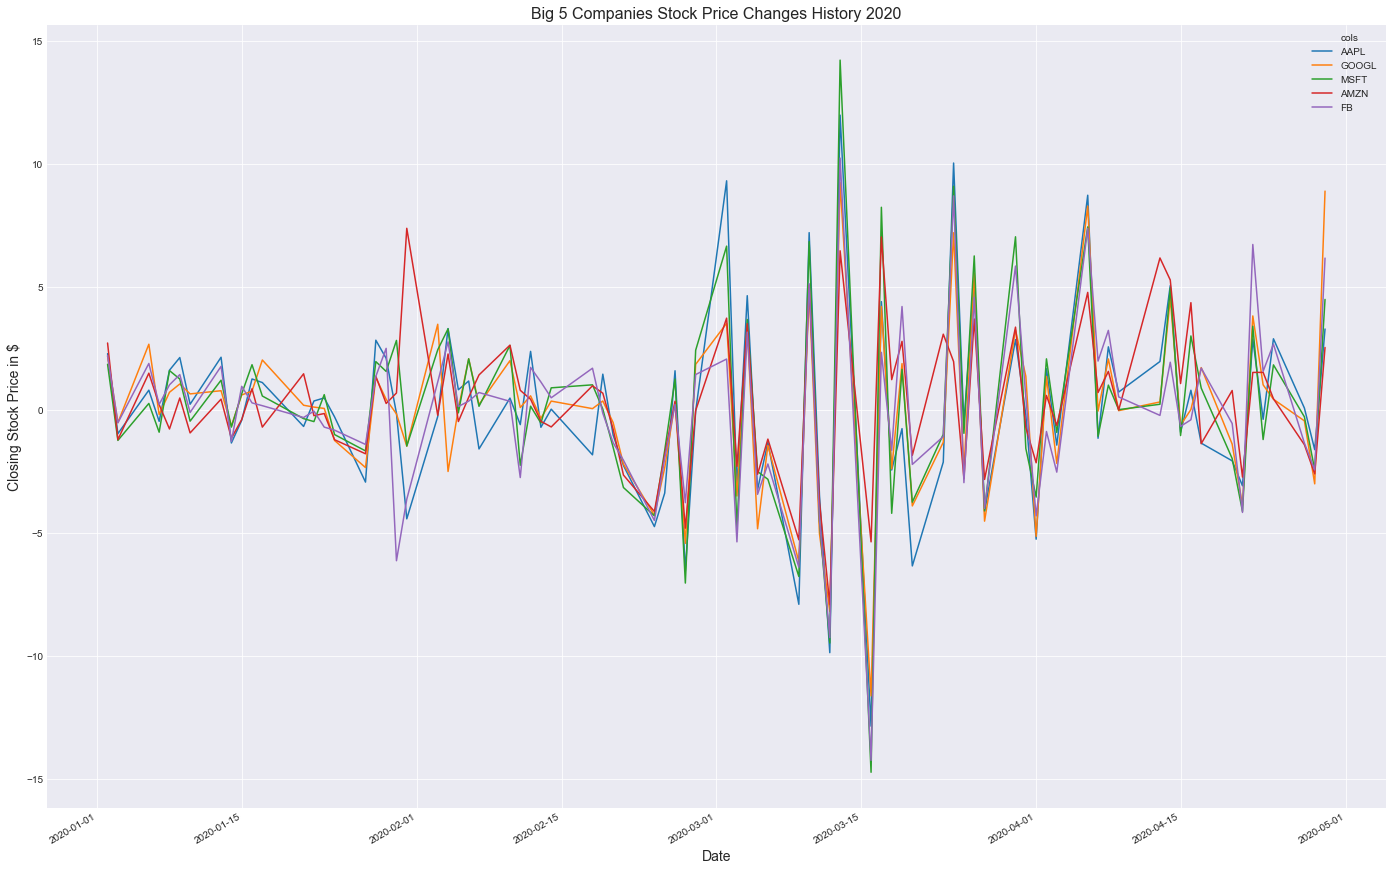

(None,           Date  cols      vals
 1   2020-01-02  AAPL  2.281632
 2   2020-01-03  AAPL -0.972204
 3   2020-01-06  AAPL  0.796825
 4   2020-01-07  AAPL -0.470305
 5   2020-01-08  AAPL  1.608629
 ..         ...   ...       ...
 410 2020-04-23    FB  1.563532
 411 2020-04-24    FB  2.668396
 412 2020-04-27    FB -1.352137
 413 2020-04-28    FB -2.447998
 414 2020-04-29    FB  6.166967
 
 [414 rows x 3 columns])

In [45]:
df_plot = df1.reset_index().melt('Date', var_name='cols',  value_name='vals')

df_plot.isna().values.any()


# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(24,16))
sns.lineplot(x="Date", y="vals", hue='cols', data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Big 5 Companies Stock Price Changes History 2020', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)

# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show(), df_plot[1:]

### Prediction



In [46]:
df = pd.read_csv('data/close_price_big_5.csv', index_col=['Date'], infer_datetime_format=True, parse_dates=['Date'])

df.head(10)

,AAPL,GOOGL,MSFT,AMZN,FB
Date,,,,,
2018-12-31,157.740005,1044.959961,101.570000,1501.969971,131.089996
2019-01-02,157.919998,1054.680054,101.120003,1539.130005,135.679993
2019-01-03,142.190002,1025.469971,97.400002,1500.280029,131.740005
2019-01-04,148.259995,1078.069946,101.930000,1575.390015,137.949997
2019-01-07,147.929993,1075.920044,102.059998,1629.510010,138.050003
2019-01-08,150.750000,1085.369995,102.800003,1656.579956,142.529999
2019-01-09,153.309998,1081.650024,104.269997,1659.420044,144.229996
2019-01-10,153.800003,1078.829956,103.599998,1656.219971,144.199997
2019-01-11,152.289993,1064.469971,102.800003,1640.560059,143.800003


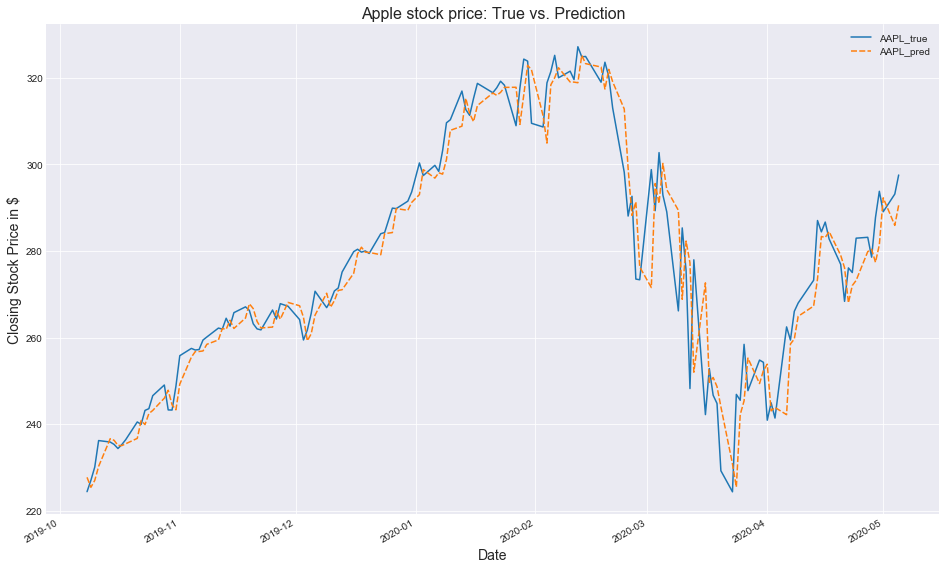

Apple, Google, Microsoft, Amazon, Facebook stocks accuracy: 
91.72345000886915
90.3680254882029
88.872482145536
94.08014051358737
88.7548251352636
Average: 
90.7597846582918 %


In [47]:
def getFeature(raw_feature):
    
    # based on last price and the mean.
    res = np.array([ raw_feature.values[-1], np.mean(raw_feature)])

    return res

def create_Xy(df, history):
    '''df has index as date
    columns are stock price of the companies
    '''

    X, y, dates = [], [], []
    for row_idx in range(history, len(df)):
        y.append( df.iloc[row_idx,:].values.reshape(-1) )
        X.append( getFeature(df.iloc[row_idx-history:row_idx,:]).reshape(-1) )
        dates.append(df.index[row_idx])
    X, y = np.array(X), np.array(y)
    return X, y, dates

X,y,dates = create_Xy(df[0:], history=2)
# use 57% of the dataset to train (use past price to predict future price)
n_train = len(y) * 57 // 100
X_train, y_train, dates_train, X_test, y_test, dates_test = X[:n_train], y[:n_train], dates[:n_train], X[n_train:], y[n_train:], dates[n_train:]

clf = LinearRegression()
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

y_test[:,0], ypred[:,0]

df_plot = pd.DataFrame({"AAPL_true": y_test[:,0], 'AAPL_pred': ypred[:,0]}, index=dates_test)

# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Apple stock price: True vs. Prediction', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

sum = 0;

print('Apple, Google, Microsoft, Amazon, Facebook stocks accuracy: ')
for i in range(5): 
    print(r2_score(y_test[:,i], ypred[:,i]) * 100)
    sum += r2_score(y_test[:,i], ypred[:,i])
    
print('Average: ')
print(sum / 5 * 100, "%")

# print('mean_squared_error:')
# for i in range(5):
#     print(mean_squared_error(y_test[:,i], ypred[:,i]))

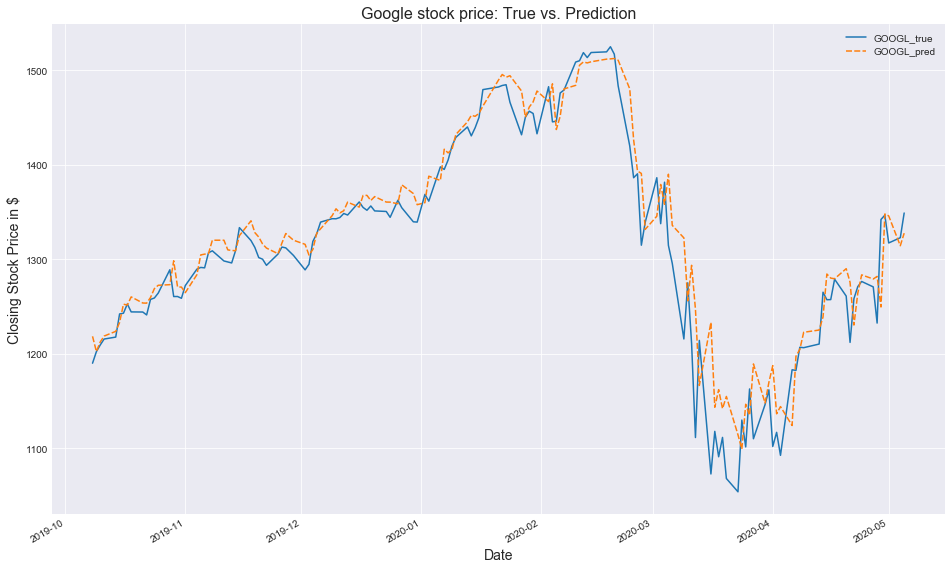

90.3680254882029

In [48]:

df_plot = pd.DataFrame({"GOOGL_true": y_test[:,1], 'GOOGL_pred': ypred[:,1]}, index=dates_test)

# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Google stock price: True vs. Prediction', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

r2_score(y_test[:,1], ypred[:,1]) * 100

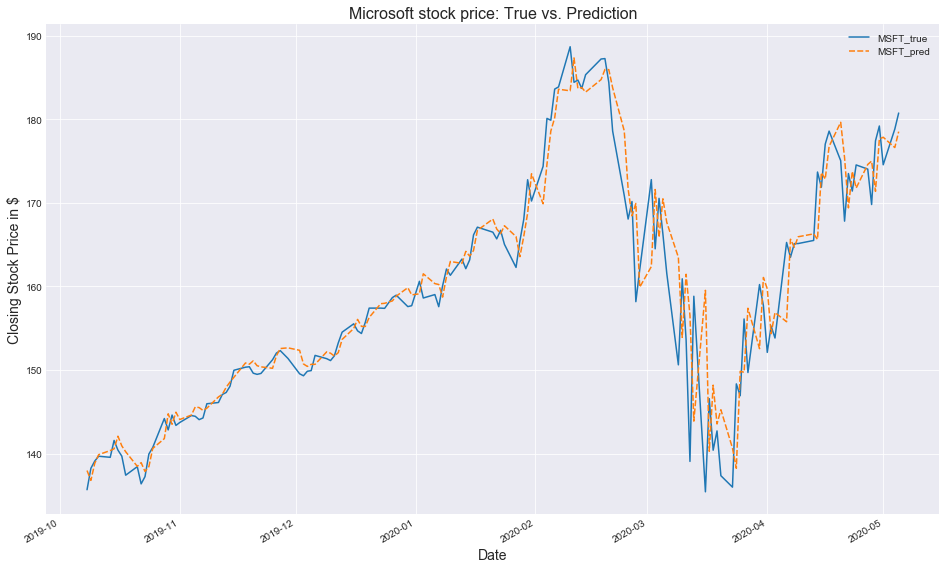

88.872482145536

In [49]:
clf = LinearRegression()
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

y_test[:,2], ypred[:,2]

df_plot = pd.DataFrame({"MSFT_true": y_test[:,2], 'MSFT_pred': ypred[:,2]}, index=dates_test)

# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Microsoft stock price: True vs. Prediction', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

r2_score(y_test[:,2], ypred[:,2]) * 100

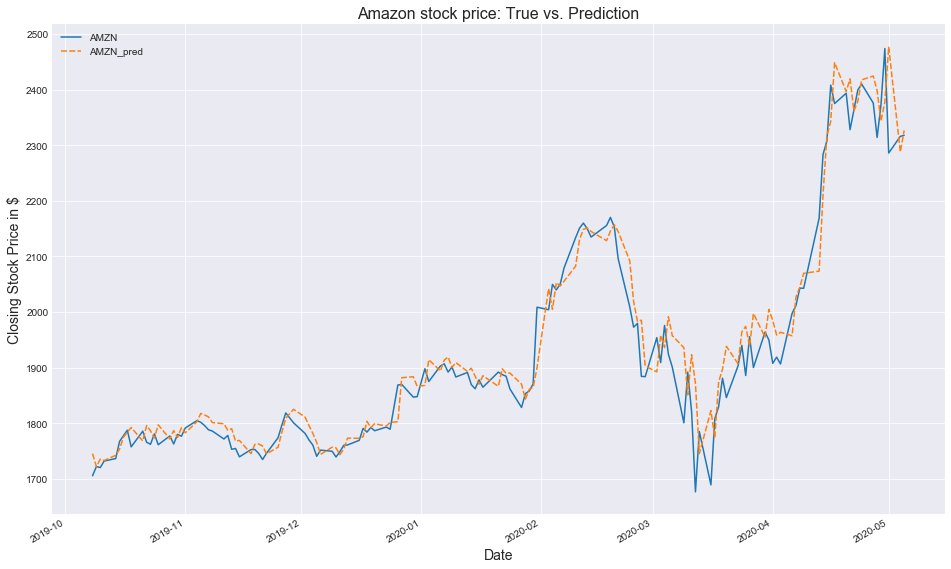

94.08014051358737

In [50]:
df_plot = pd.DataFrame({"AMZN": y_test[:,3], 'AMZN_pred': ypred[:,3]}, index=dates_test)

# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Amazon stock price: True vs. Prediction', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

r2_score(y_test[:,3], ypred[:,3]) * 100

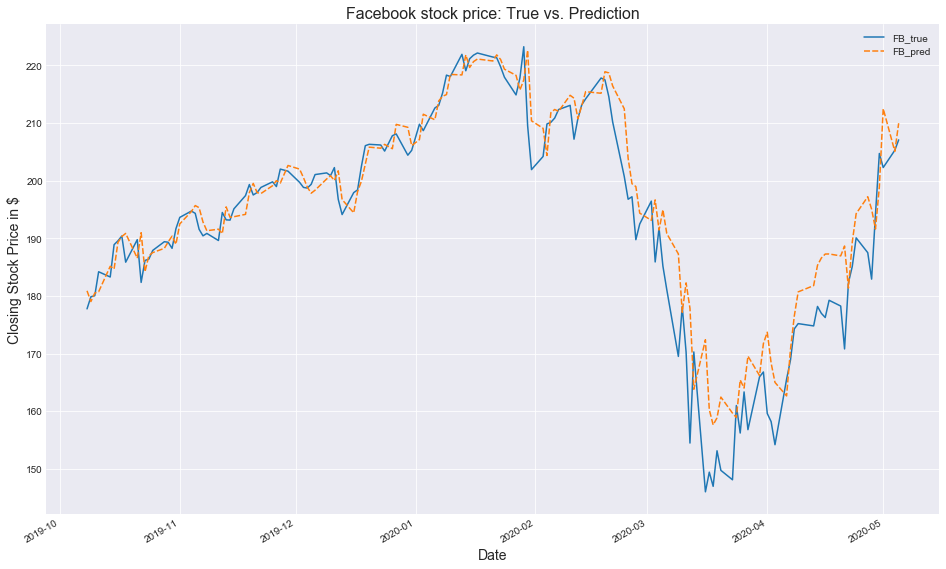

88.7548251352636

In [51]:

df_plot = pd.DataFrame({"FB_true": y_test[:,4], 'FB_pred': ypred[:,4]}, index=dates_test)

# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Facebook stock price: True vs. Prediction', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

r2_score(y_test[:,4], ypred[:,4]) * 100